# Analyze a coupled 2-transmon system

Requirements:
* Python 3.8+
* Qiskit Metal: https://qiskit-community.github.io/qiskit-metal/
* Ansys Electronics desktop: https://www.lib.ncsu.edu/software

## Included libs

In [1]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr


## Create a Planar Design

See the Planar design https://qiskit-community.github.io/qiskit-metal/stubs/qiskit_metal.designs.DesignPlanar.html

In [2]:
design = designs.DesignPlanar({}, True)

# set the chi dimensions...
design.chips.main.size['size_x'] = '2mm'

# Add Y dimmension here...

# Create a metal ui: Tip use MetalGUI(design)


create the TwoTransmon design, consisting of 2 transmons connected by a short coupler.

In [3]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight

# qubit #1
q1 = TransmonPocket(design, 'Q1', options = dict(
    pad_width = '425 um',
    pocket_height = '650um',
    connection_pads=dict(
        readout = dict(loc_W=+1,loc_H=+1, pad_width='200um')
    )))

# Add qubit #2 code here...

# Add coupler code here: coupler = RouteStraight(design ...

# Add code to rebuild the Metal UI and autscale...


Display the current table describing the junctions in the qiskit metal design

In [4]:
# Add code here...

#design.qgeometry.tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,hfss_resistance,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name
0,1,rect_jj,"LINESTRING (0.00000 -0.01500, 0.00000 0.01500)",1,False,False,main,0.02,10nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction
1,2,rect_jj,"LINESTRING (1.00000 -0.01500, 1.00000 0.01500)",1,False,False,main,0.02,10nH,0,0,0.000007,10nH,0,0,0.000007,my_other_junction


## Update inductance, capacitance
Update these values in the qubit instances, and then propagate the update to the table with a rebuild(). Replace those values with a variable name, which will later be set directly in the renderer. 


In [5]:
qcomps = design.components  # short handle (alias)

# qubit #1
qcomps['Q1'].options['hfss_inductance'] = 'Lj1'
qcomps['Q1'].options['hfss_capacitance'] = 'Cj1'

# Add qubit #2 here...

# Add GUI Rebuild and autoscale()...


## Finite Element Eigenmode Analysis

In [6]:
from qiskit_metal.analyses.quantization import EPRanalysis
eig_2qb = EPRanalysis(design, "hfss")

update the setup of this analysis to reflect what we plan to do: 
* define the variables that we have assigned to the inductance and capacitance of the junctions;
* increase accuracy of the convergence;
* observe the eigenmode corresponding to both qubits.

In [7]:
# Add code for setup vars here...
# Here are the first two props.
eig_2qb.sim.setup.max_passes = 5
eig_2qb.sim.setup.max_delta_f = 0.05

# Add n_modes = 2

# Add vars Lj1= '13 nH', Cj1= '0 fF', Lj2= '9 nH', Cj2= '0 fF'

# Display setup: eig_2qb.sim.setup


{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 2,
 'max_delta_f': 0.05,
 'max_passes': 5,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj1': '13 nH', 'Cj1': '0 fF', 'Lj2': '9 nH', 'Cj2': '0 fF'}}

In [8]:
# Set the renderer options here... 
eig_2qb.sim.renderer.options['x_buffer_width_mm'] = 0.5

# Stp the y buffer y_buffer_width_mm = 0.5
#eig_2qb.sim.renderer.options['y_buffer_width_mm'] = 0.5

# Display options ...


{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'max_mesh_length_port': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'x_buffer_width_mm': 0.5,
 'y_buffer_width_mm': 0.5,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

run the cap extraction simulation and observe the convergence.

In [9]:
# Run the simulation here ...
# USe:  name="TwoTransmons", components=['coupler', 'Q1', 'Q2']


INFO 08:19PM [connect_project]: Connecting to Ansys Desktop API...
INFO 08:19PM [load_ansys_project]: 	Opened Ansys App
INFO 08:19PM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 08:19PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/vsilva/Documents/Ansoft/
	Project:   Project1
INFO 08:19PM [connect_design]: No active design found (or error getting active design).
INFO 08:19PM [connect]: 	 Connected to project "Project1". No design detected
INFO 08:19PM [connect_design]: 	Opened active design
	Design:    TwoTransmons_hfss [Solution type: Eigenmode]
WARNING 08:19PM [connect_setup]: 	No design setup detected.
WARNING 08:19PM [connect_setup]: 	Creating eigenmode default setup.
INFO 08:19PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 08:20PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 08:20PM [analyze]: Analyzing setup Setup
08:20PM 17s INFO [get_f_convergence]: Saved convergences to C:\Users\

Plot Convenvergences in Metal

In [10]:
# Plot convergences here: tip: invoke plot_convergences() in sim
# Add code here...


Dump a screenshot of the design

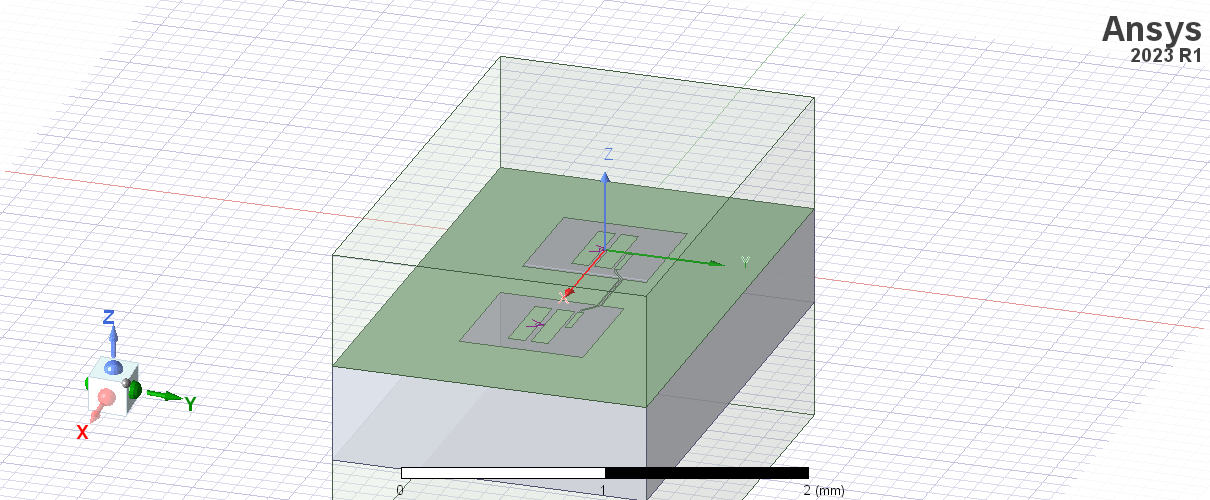

WindowsPath('C:/Users/vsilva/Documents/NCSU/etc/Hackathons/ansys.png')

In [11]:
# Save a screen shot here... (sim.save_screenshot())


Display the Ansys modeler window again and plot the E-field on the chip’s surface. Since we have analyzed 2 modes, you will need to select which mode to visualize. The default is mode 1, but the mode can inclusively be any integer between 1 and setup.n_modes.

INFO 08:20PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


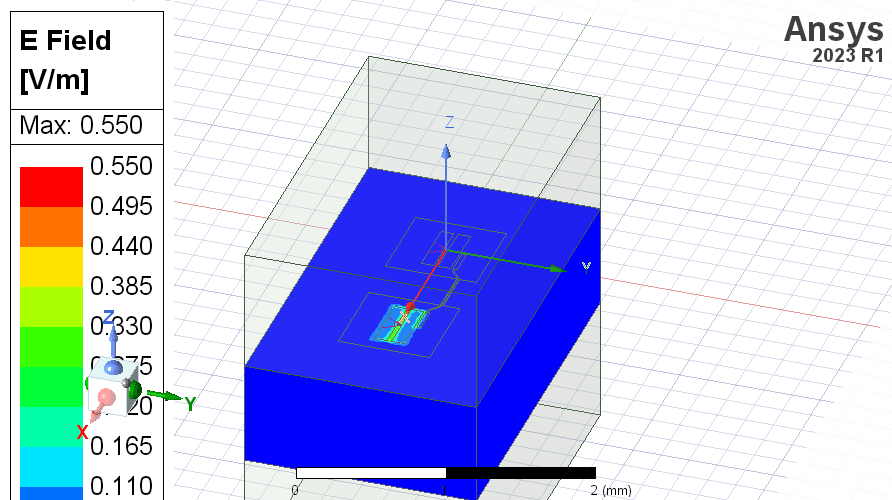

WindowsPath('C:/Users/vsilva/Documents/NCSU/etc/Hackathons/ansys.png')

In [12]:
# Add code to  display the Ansys modelere window....
# Tip:  invoke sim->plot_fields then sim->save_screenshot()


## EPR Analysis
Identify the non-linear (Josephson) junctions in the model. in this case there are 2 junctions, which we will refer to as jj1 and jj2. Also define the dissipative reference shapes. Remove the default junction and create the two.

In [13]:
# Remove the default junction 
del eig_2qb.setup.junctions['jj']

In [14]:
# Add code two create 2 junmctions
eig_2qb.setup.junctions.jj1 = Dict(rect='JJ_rect_Lj_Q1_rect_jj', line='JJ_Lj_Q1_rect_jj_',
                  Lj_variable='Lj1', Cj_variable='Cj1')

# Add code for the 2nd junction...

# Add a setup sweep_variable = 'Lj1'

# Display setup here... tip: eig_2qb.setup

{'junctions': {'jj1': {'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_',
   'Lj_variable': 'Lj1',
   'Cj_variable': 'Cj1'},
  'jj2': {'rect': 'JJ_rect_Lj_Q2_rect_jj',
   'line': 'JJ_Lj_Q2_rect_jj_',
   'Lj_variable': 'Lj2',
   'Cj_variable': 'Cj2'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj1'}

Find the electric and magnetic energy stored in the substrate and the system as a whole.

In [15]:
# Add code to run the simulation...
# Tip invoke run_epr()()


Design "TwoTransmons_hfss" info:
	# eigenmodes    2
	# variations    1
Design "TwoTransmons_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 6.26501877932832e-24
        energy_elec_substrate = 5.76127480836881e-24
        EPR of substrate = 92.0%

        energy_mag    = 5.06030021291949e-26
        energy_mag % of energy_elec_all  = 0.8%
        

Variation 0  [1/1]

  Mode 0 at 5.42 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.5%  3.336e-24  1.68e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.08%
	jj1             0.995627  (+)        0.0299745
		Energy fraction (Lj over Lj&Cj)= 97.96%
	jj2             3.9995e-05  (+)        8.33606e-07
		(U_tot_cap-U_tot_ind)/mean=1.44%
Calculating Qdielectric_main for mode 0 (0/1)
p_dielectric_main_0 = 

INFO 08:20PM [hfss_report_f_convergence]: Curves Set Attribute Line Width (vsilva) ['Freq. vs. pass:re(Mode(1)):Curve1', 'Freq. vs. pass:re(Mode(2)):Curve1'] Setup fields: <pyEPR.ansys.HfssFieldsCalc object at 0x00000109E121ED00>
WARNING 08:20PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project1\TwoTransmons_hfss\2024-03-23 20-20-40.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.029327
1    1.028690
dtype: float64

Pm_norm idx =
     jj1    jj2
0   True  False
1  False   True
*** P (participation matrix, not normlz.)
        jj1       jj2
0  0.966652  0.000039
1  0.000038  0.964343

*** S (sign-bit matrix)
   s_jj1  s_jj2
0      1     -1
1      1      1
*** P (participation matrix, normalized.)
         1  3.9e-05
   3.8e-05     0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       289   0.0451
    0.0451      289

*** Chi matrix ND (MHz) 
       325   0.0478
    0.0478      319

*** Frequencies O1 PT (MHz)
0    5127.086197
1    6243.814067
dtype: float64

*** Frequencies ND (MHz)
0    5109.608920
1    6229.662416
dtyp

#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,13
0,5109.61
1,6229.66


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0       1
Lj1                  
13  0  324.79    0.05
    1    0.05  318.97

## Cleanup

Release Ansys. **If you don't release, the Ansys will not clode.**


In [16]:
# Add code to release ANsys here...
# Tip: sim->close()


In [17]:
# Close metal window: Invoke the close() method in the main guio window


True